In [1]:
import sys
import os
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typeguard import typechecked


In [2]:
kaggle_gw_dir = str(pathlib.Path(os.getcwd(), '..').resolve())
sys.path.insert(0, kaggle_gw_dir)

In [3]:
import gw_data

In [4]:
DATA_DIR = Path('/tmp/filter_sig-000')

In [5]:
# Suitable for a 2020ish MacBook Pro
plt.rcParams['figure.dpi']= 140

SMALL_FONT_SIZE = 6
MEDIUM_FONT_SIZE = 8
BIGGER_FONT_SIZE = 10

plt.rc('font', size=SMALL_FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)  # fontsize of the figure title

In [6]:
training_labels = pd.read_csv(DATA_DIR / "training_labels.csv")

In [7]:
@typechecked
def max_corr(example_id: str) -> float:
    filename = str(gw_data.train_file(DATA_DIR, example_id, "correlation"))
    c = np.load(filename)
    return np.max(c[0])

In [8]:
target_and_corr = pd.DataFrame()

In [9]:
target_and_corr["target"] = training_labels["target"]

In [10]:
target_and_corr["corr"] = training_labels["id"].map(lambda id: max_corr(id))

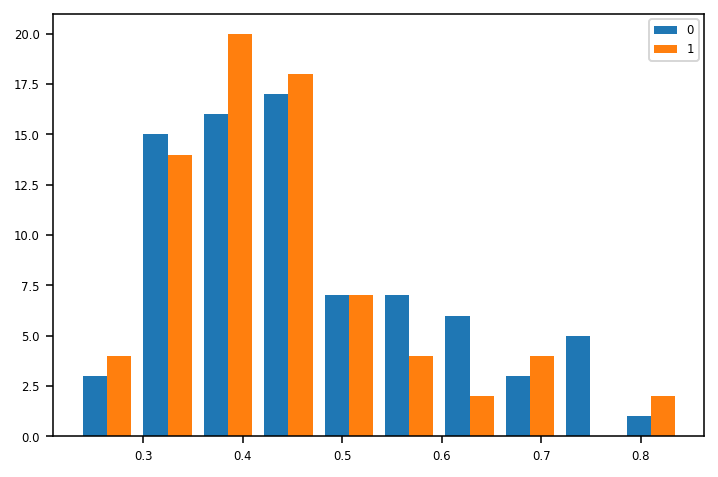

In [11]:
plt.hist(
    [target_and_corr["corr"][target_and_corr["target"] == 0],
     target_and_corr["corr"][target_and_corr["target"] == 1]],
    label=["0", "1"],
)
plt.legend()
plt.show()